<a href="https://colab.research.google.com/github/riya-verma27/profit_prediction/blob/main/profit_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing/reading the dataset
import pandas as pd 
df = pd.read_csv("1000_Companies.csv")

In [3]:
#analyzing the null values
df.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [4]:
df.describe().style.background_gradient(cmap='CMRmap')

,R&D Spend,Administration,Marketing Spend,Profit
count,998.000000,1000.000000,997.000000,1000.000000
mean,81832.592385,122963.897612,226885.715566,119546.164656
std,46440.103030,12613.927535,90869.558039,42888.633848
min,542.050000,51283.140000,1903.930000,14681.400000
25%,43281.500000,116640.684850,151751.515600,85943.198543
50%,80140.000000,122421.612150,225043.676800,117641.466300
75%,124620.500000,129139.118000,309075.450300,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


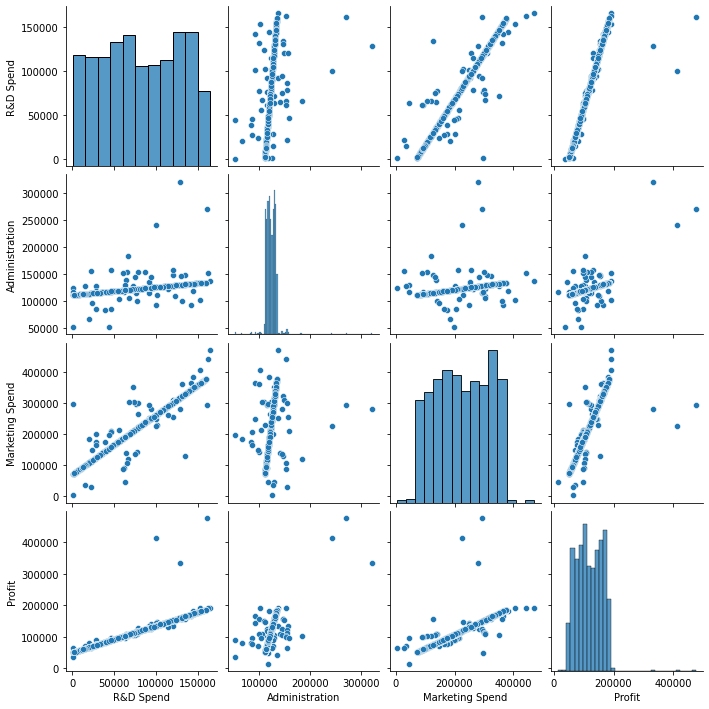

In [5]:
sns.pairplot(df)

In [6]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


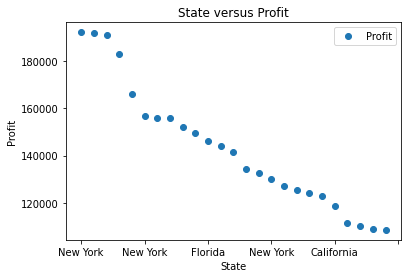

In [7]:
dff=df.head(25)
dff.plot(x="State", y="Profit",style='o')
plt.title("State versus Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [8]:
#removing the unwanted parameters
df1 = df.drop(['State'],axis='columns')
df1.head(10)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [9]:
#removing the null values
dataset = df1.dropna()
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [10]:
dataset.shape

(996, 4)

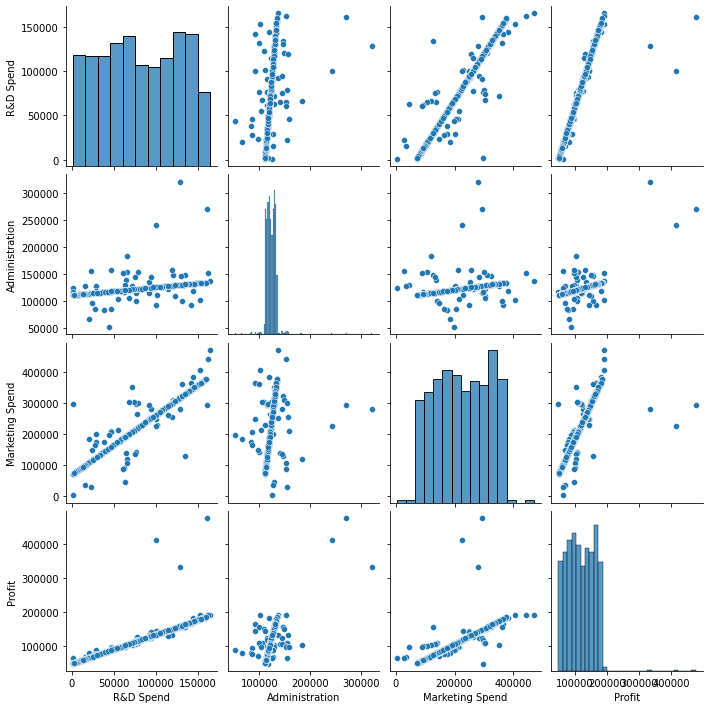

In [11]:
sns.pairplot(dataset)

In [12]:
X=dataset[['R&D Spend','Administration','Marketing Spend']]

In [13]:
X.shape

(996, 3)

In [14]:
Y=dataset['Profit']

In [15]:
Y.shape

(996,)

In [16]:
#removing the outliers
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataset)
dataset.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
from sklearn.model_selection import train_test_split
#here 30% data is used for testing and 70% for training the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=29)

In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((697, 3), (299, 3), (697,), (299,))

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_lr=LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_predicted=model_lr.predict(X_test)

In [22]:
data=pd.DataFrame({"Actual": Y_test,"Predicted": Y_predicted})
data

,Actual,Predicted
495,174050.75270,174685.851776
201,163549.80310,164061.926877
205,94297.52743,93998.646394
828,125667.96090,125736.455120
438,102740.48900,102540.482532
...,...,...
916,103813.47900,103626.038144
613,138213.22960,138428.639989
227,141814.06780,142071.647084
404,125636.35210,125704.476203


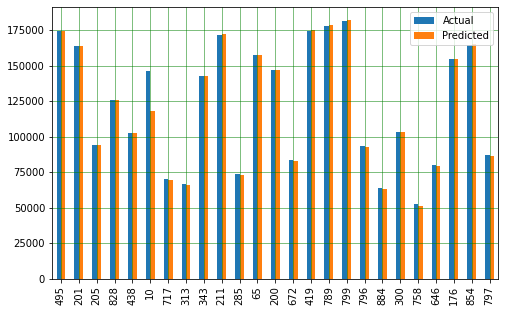

In [23]:
d2=data.head(25)
d2.plot(kind='bar',figsize=(8,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
mean_absolute_percentage_error(Y_test,Y_predicted)

0.02087971936523268

In [26]:
from sklearn.metrics import r2_score

r2Score = r2_score(Y_predicted, Y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 92.03076283301935


In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=10) #n_estimators define the number of decision trees
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [28]:
y_p = regressor.predict(X_test)


In [29]:
d3=pd.DataFrame({"Actual": Y_test,"Predicted": y_p})
d3

,Actual,Predicted
495,174050.75270,174031.958250
201,163549.80310,163476.504940
205,94297.52743,94310.341799
828,125667.96090,125847.874660
438,102740.48900,102748.348520
...,...,...
916,103813.47900,103930.175220
613,138213.22960,138012.898340
227,141814.06780,141720.266580
404,125636.35210,125807.893820


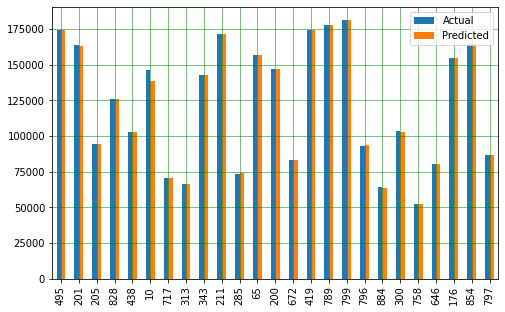

In [30]:
d4=d3.head(25)
d4.plot(kind='bar',figsize=(8,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [31]:
mean_absolute_percentage_error(Y_test, y_p)

0.003900033112945645

In [32]:
#find the accuracy
from sklearn.metrics import r2_score
r2_score(Y_test,y_p)

0.9899256323427182

In [33]:
my_pred=regressor.predict([['122107.34','92999.77','466168.42']])
print("Predicted Score=",format(my_pred[0]))

Predicted Score= 154815.53901999997


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


The accuracy of random forest regression turns out to be 97% while in case of multiple linear regression ,it was 92%